# Repaso de temas vistos y adicionales
<br>
<br>

<img src="./images/explorar_datasets.png" height = "600" width = "600">

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
df_employee = pd.read_csv("./datasets/employee_data.csv")
df_employee.loc[635:650, "annual_salary"] = np.nan
df_employee.head(3)

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN


In [3]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             1000 non-null   int64  
 1   first_name         999 non-null    object 
 2   last_name          999 non-null    object 
 3   gender             793 non-null    object 
 4   birth_date         999 non-null    object 
 5   employment_status  811 non-null    object 
 6   annual_salary      983 non-null    float64
 7   tax_file_no        0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


## Porcentaje de datos nulos

In [4]:
df_employee.isnull().sum()

number                  0
first_name              1
last_name               1
gender                207
birth_date              1
employment_status     189
annual_salary          17
tax_file_no          1000
dtype: int64

In [5]:
rows = df_employee.shape[0]
columns = df_employee.shape[1]
print("cantidad de filas y columnas:",df_employee.shape)

cantidad de filas y columnas: (1000, 8)


In [6]:
counts = rows*columns
counts

8000

In [7]:
number_of_nulls = df_employee.isnull().sum().sum()
porcentage_of_missing = (number_of_nulls/counts)*100
print(f"Porcentage de valores nulos en el dataset: ------> {porcentage_of_missing}%")
print(f"Cantidad de valores nulos en el dataset: --------> {number_of_nulls}")

Porcentage de valores nulos en el dataset: ------> 17.7%
Cantidad de valores nulos en el dataset: --------> 1416


## Eliminar datos nulos de columnas

Las columnas que sean irrelevantes desde el punto de vista del contexto, o que tengan demasiado valores nulos y no puedan ser "imputados" se deben remover de los datos

In [8]:
df_employee.dropna(axis = "columns", how = "all")

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0
...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0


In [9]:
df_employee.drop(["tax_file_no"], axis = "columns")
#df_employee.drop(labels = ["tax_file_no"], axis = 1)

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0
...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0


## Remover renglones

Podemos remover renglones que tengan cierta cantidad datos nulos.

In [10]:
df_employee.dropna(axis = "rows", how = "all")
# df_employee.dropna(axis = 0, how = "all")
# df_employee.dropna(axis = "index", how = "all")

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
...,...,...,...,...,...,...,...,...
995,712,Dann,Crooks,NaN,1983-12-25,CA,66592.0,NaN
996,132,Maxim,Orn,M,1971-03-01,CA,127966.0,NaN
997,126,Kimberli,Walter,M,1976-03-07,CA,60712.0,NaN
998,277,Talmage,Bartell,F,1989-02-19,PE,103606.0,NaN


In [11]:
df_employee.head(10)

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
5,264,Jaeda,Effertz,NaN,1994-03-21,PE,131924.0,NaN
6,165,Jalissa,Bogisich,F,1974-01-07,PE,101133.0,NaN
7,211,Lexie,Robel,M,1997-09-05,NaN,106595.0,NaN
8,510,Billy,Reilly,M,1977-04-30,NaN,75300.0,NaN
9,940,Marlana,Moen,F,1979-05-05,CA,140611.0,NaN


In [12]:
df_employee_new = df_employee.dropna(axis = "index", how = "all", thresh = 7) # thresh o threshold
df_employee_new.shape

(628, 8)

## Reemplazar valores nulos

Para eso hay diversas técnicas y dependerá tanto del contexto como del tipo de dato que estemos analizando,

In [13]:
def plot_frecuency_distribution(df = pd.DataFrame(), 
                                category = str, 
                                fs_title = 12, 
                                fs_xlabel = 12, 
                                fs_ylabel = 12, 
                                xticks = 0, 
                                yticks = 0, 
                                title = str, 
                                size = (5, 5), alpha_ = 0.5):
    
    cat_count = df[category].value_counts()
    x = cat_count.values
    y = cat_count.index
    
    plt.figure(figsize = size)
    
    sns.set(style = "darkgrid")
    sns.barplot(y, x, alpha = alpha_)
    plt.title(f"{title} {category}", fontsize = fs_title)
    plt.xlabel(category, fontsize = fs_xlabel)
    plt.ylabel("Conteo", fontsize = fs_ylabel)
    plt.xticks(rotation = xticks)
    plt.yticks(rotation = yticks);

In [14]:
x = df_employee["gender"].value_counts()
x

M    414
F    379
Name: gender, dtype: int64

In [15]:
x.index

Index(['M', 'F'], dtype='object')

In [16]:
x.values

array([414, 379], dtype=int64)

### Columna Gender

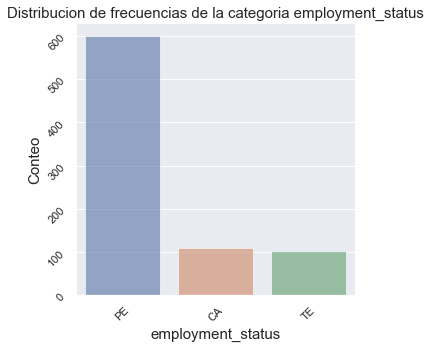

In [17]:
plot_frecuency_distribution(df_employee, 
                            category = "employment_status",
                            fs_title = 15, 
                            fs_xlabel = 15, 
                            fs_ylabel = 15,
                            xticks = 45, 
                            yticks = 45, 
                            title = "Distribucion de frecuencias de la categoria", 
                            size = (5, 5), 
                            alpha_ = 0.6) 

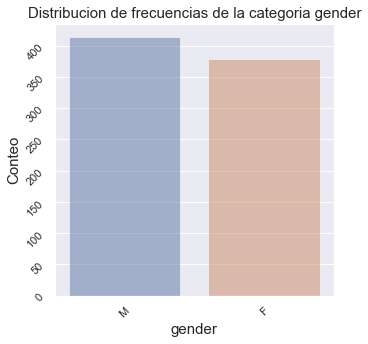

In [18]:
plot_frecuency_distribution(df_employee, 
                            category = "gender",
                            fs_title = 15, 
                            fs_xlabel = 15, 
                            fs_ylabel = 15, 
                            xticks = 45, 
                            yticks = 45, 
                            title = "Distribucion de frecuencias de la categoria", 
                            size = (5, 5)) 

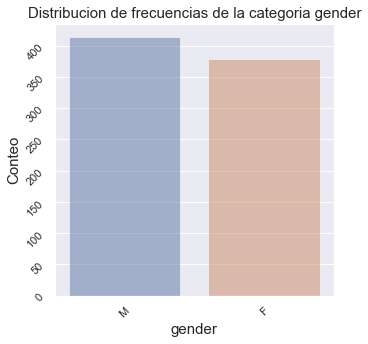

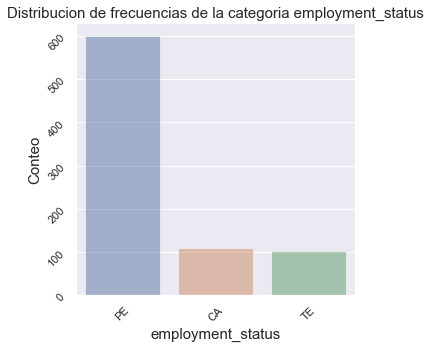

In [19]:
categories = ["gender", "employment_status"]

for cat in categories:
    
    plot_frecuency_distribution(df_employee, 
                            category = cat,
                            fs_title = 15, 
                            fs_xlabel = 15, 
                            fs_ylabel = 15,
                            xticks = 45, 
                            yticks = 45, 
                            title = "Distribucion de frecuencias de la categoria", 
                            size = (5, 5)) 

#### corregir utilizando la función fillna de pandas

#### Aplicar una función personalizada

In [20]:
df_employee.head(3)
df_employee.dropna(axis = "index", how = "all", thresh = 2, inplace = True)

In [21]:
df_employee.head(10)

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
5,264,Jaeda,Effertz,NaN,1994-03-21,PE,131924.0,NaN
6,165,Jalissa,Bogisich,F,1974-01-07,PE,101133.0,NaN
7,211,Lexie,Robel,M,1997-09-05,NaN,106595.0,NaN
8,510,Billy,Reilly,M,1977-04-30,NaN,75300.0,NaN
9,940,Marlana,Moen,F,1979-05-05,CA,140611.0,NaN


In [22]:
def clasificar_genero_por_nombre(item:str, gender):
    
    if not pd.isna(gender):
        return gender
    
    if item.endswith("o") or item.endswith("r") or item.endswith("d"):
        return "M"
    
    else:
        return "F"

In [23]:
df_employee["gender"] = df_employee.apply(lambda x: clasificar_genero_por_nombre(x["first_name"], x["gender"]), axis = 1)
df_employee.head(10)

,number,first_name,last_name,gender,birth_date,employment_status,annual_salary,tax_file_no
0,483,Lenord,Kihn,M,1994-07-01,NaN,64598.0,NaN
1,478,Palma,Beahan,F,1972-05-06,PE,124103.0,NaN
2,348,Hebert,Muller,M,1990-09-04,PE,100324.0,NaN
3,757,Virginia,Ullrich,M,1991-09-23,PE,144957.0,NaN
4,937,Roby,Hudson,M,1997-01-15,NaN,137659.0,NaN
5,264,Jaeda,Effertz,F,1994-03-21,PE,131924.0,NaN
6,165,Jalissa,Bogisich,F,1974-01-07,PE,101133.0,NaN
7,211,Lexie,Robel,M,1997-09-05,NaN,106595.0,NaN
8,510,Billy,Reilly,M,1977-04-30,NaN,75300.0,NaN
9,940,Marlana,Moen,F,1979-05-05,CA,140611.0,NaN


### Employment status

In [24]:
df_employee.groupby(["employment_status"]).size()

employment_status
CA    109
PE    599
TE    103
dtype: int64

In [25]:
df_employee[["employment_status"]].value_counts()

employment_status
PE                   599
CA                   109
TE                   103
dtype: int64

In [26]:
df_employee["employment_status"] = df_employee["employment_status"].astype("category")

In [27]:
df_employee["employment_status"].cat.categories.tolist()

['CA', 'PE', 'TE']

In [28]:
y = df_employee["employment_status"].value_counts()
labels = df_employee["employment_status"].astype("category").cat.categories.tolist()
[y[var] for var in labels]

[109, 599, 103]

In [29]:
def plot_pie_chart(df = pd.DataFrame(), 
                   category = str, 
                   fig_size = (5, 5), 
                   explode_ = (0, 0, 0), 
                   shadow_ = False, 
                   colors_ = ["r", "g", "b"]):
    
    labels = df[category].astype("category").cat.categories.tolist()  
    counts = df[category].value_counts()
    sizes = [counts[var] for var in labels]
    
    fig, axs = plt.subplots(figsize = fig_size)
    
    axs.pie(sizes, labels = labels, autopct = "%1.1f%%", 
            explode = explode_, shadow = shadow_, colors = colors_);

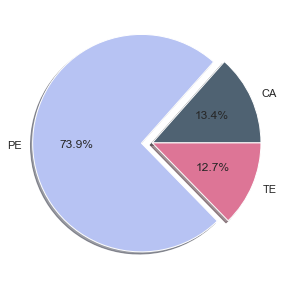

In [30]:
plot_pie_chart(df_employee, 
               category = "employment_status", 
               explode_ = (0, 0.1, 0), 
               shadow_ = True, 
               colors_ = ["#4F6272", "#B7C3F3", "#DD7596"])

## annual_salary

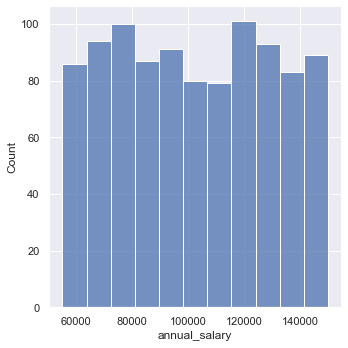

In [31]:
sns.displot(df_employee["annual_salary"]);

# Manipular Fechas

<br>
<img src="./images/fechas.png" height = "550" width = "550">

In [32]:
df_employee["birth_date"] = pd.to_datetime(df_employee["birth_date"])
#df_employee["birth_date"].astype("datetime64[ns]")

In [34]:
df_employee["birth_date"][0]

Timestamp('1994-07-01 00:00:00')

In [35]:
year_now = datetime.today().year
month_now = datetime.today().month
day_now = datetime.today().day
hour_now = datetime.today().hour
minutes_now = datetime.today().minute
seconds_now = datetime.today().second

f"{year_now}/{month_now}/{day_now} {hour_now}:{minutes_now}:{seconds_now}"

'2022/2/26 13:10:38'

In [50]:
datetime.today()

datetime.datetime(2022, 2, 26, 13, 16, 44, 311364)

In [39]:
fecha_actual = datetime.today()
fecha_actual

datetime.datetime(2022, 2, 26, 13, 12, 9, 855107)

In [62]:
df_employee["test_fecha"] = "26-09-1995"

In [63]:
df_employee["test_fecha"] = df_employee["test_fecha"] .astype("datetime64")
df_employee["test_fecha"]

0     1995-09-26
1     1995-09-26
2     1995-09-26
3     1995-09-26
4     1995-09-26
         ...    
995   1995-09-26
996   1995-09-26
997   1995-09-26
998   1995-09-26
999   1995-09-26
Name: test_fecha, Length: 999, dtype: datetime64[ns]

In [55]:
df_employee["test_fecha"][0]

Timestamp('1995-09-26 18:00:00')

In [61]:
df_employee["test_fecha"][0].year

1995

In [41]:
df_employee["birth_date"]

0     1994-07-01
1     1972-05-06
2     1990-09-04
3     1991-09-23
4     1997-01-15
         ...    
995   1983-12-25
996   1971-03-01
997   1976-03-07
998   1989-02-19
999   1993-04-01
Name: birth_date, Length: 999, dtype: datetime64[ns]

In [59]:
(fecha_actual - df_employee["birth_date"])[0]

Timedelta('10102 days 13:12:09.855107')

In [46]:
df_employee["age"] = (fecha_actual - df_employee["birth_date"]).dt.days/365
df_employee["age"]

0      27.676712
1      49.843836
2      31.501370
3      30.449315
4      25.131507
         ...    
995    38.200000
996    51.027397
997    46.005479
998    33.041096
999    28.926027
Name: age, Length: 999, dtype: float64

# Otro dataset

In [64]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

In [65]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


## Exploración del dataset

In [67]:
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
year,162049.0,2014.000000,0.000000,2014.0,2014.0,2014.0,2014.0,2014.0
month,162049.0,6.605027,3.324399,1.0,4.0,7.0,9.0,12.0
day,162049.0,15.749890,8.789417,1.0,8.0,16.0,23.0,31.0
dep_time,161192.0,1278.283755,522.583793,1.0,831.0,1217.0,1721.0,2400.0
dep_delay,161192.0,6.133859,29.112035,-37.0,-5.0,-2.0,5.0,1553.0
arr_time,161061.0,1482.501282,523.958781,1.0,1127.0,1517.0,1918.0,2400.0
arr_delay,160748.0,2.240868,31.191037,-67.0,-12.0,-4.0,7.0,1539.0
flight,162049.0,1357.356725,1495.271031,2.0,408.0,694.0,1726.0,6527.0
air_time,160748.0,152.588511,72.547469,18.0,103.0,129.0,199.0,422.0
distance,162049.0,1204.514634,653.150062,93.0,689.0,991.0,1660.0,2724.0


In [68]:
df_flights.describe(include = "O").T

,count,unique,top,freq
carrier,162049,11,AS,62460
tailnum,161801,3022,N223AG,755
origin,162049,2,SEA,108714
dest,162049,71,SFO,12809


## Visualización de variables categóricas

### Box Plot

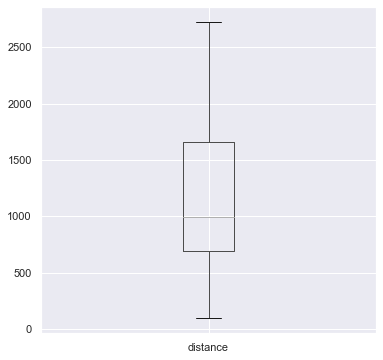

In [72]:
df_flights.boxplot("distance", figsize = (6, 6));

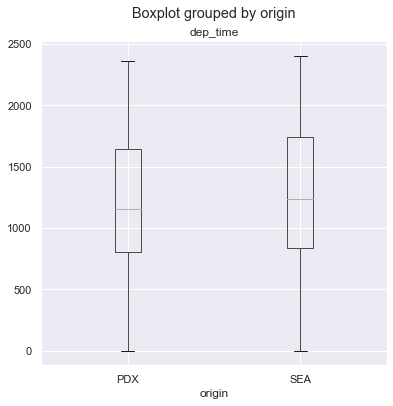

In [71]:
df_flights.boxplot("dep_time", "origin", figsize = (6, 6));

In [74]:
df = pd.read_csv("./datasets/ERC_Data.csv", na_values = "?")
df.head()

,id,Ind_ERC,Ind_Ant_Fam_DM,Ind_Ant_Fam_Enf_Cardio,Ind_Ant_Fam_ERC,Dias_DM,Dias_HTA,Ind_Ant_Per_Anemia,Ind_Ant_Per_AR,Ind_Ant_Per_Dislip,...,Valor_HbA1c,Valor_IMC,Valor_PAD,Valor_PAS,Valor_PCR,Valor_TFG,Valor_Trigliceridos,Edad,Raza_Desc,Sexo_Cd
0,123391,Si,No,No,Si,0,3709,No,No,Si,...,NaN,19.909972,70.0,110.0,NaN,51.625386,62.0,68,MESTIZO,M
1,44515,No,No,No,No,0,0,No,No,No,...,NaN,31.833910,60.0,100.0,NaN,NaN,171.2,49,SIN INFORMACION DESDE LA FUENTE,M
2,225004,Si,No,No,No,0,1420,No,No,No,...,NaN,23.108435,80.0,140.0,NaN,NaN,56.0,96,BLANCO,M
3,393421,No,No,No,No,0,3776,No,Si,No,...,5.44,27.303438,80.0,120.0,0.05,133.804060,112.0,93,BLANCO,F
4,103672,No,No,No,No,0,0,No,No,No,...,NaN,22.632591,60.0,100.0,NaN,NaN,NaN,57,SIN INFORMACION DESDE LA FUENTE,F


<AxesSubplot:>

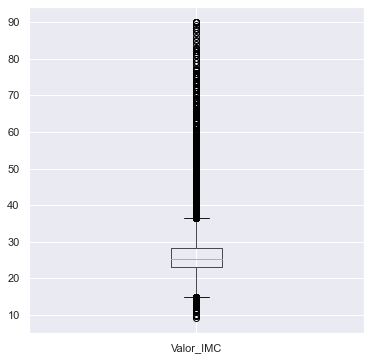

In [75]:
df.boxplot("Valor_IMC", figsize = (6, 6))

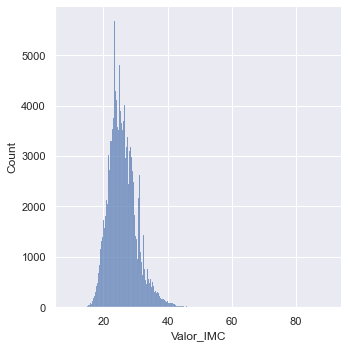

In [76]:
sns.displot(df["Valor_IMC"])

# Seleccionar las variables

A continuación vemos que las posibles variables categóricas son las que son de tipo "object". Las demás son numéricas.

In [78]:
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [79]:
df_flights.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object

In [81]:
df_flights_num = df_flights.select_dtypes(exclude = "O")
df_flights_num.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
flight         int64
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object

## Dataframe de solo variables categóricas

In [83]:
df_flights_cat = df_flights.select_dtypes(include = "O")
df_flights_cat.dtypes

carrier    object
tailnum    object
origin     object
dest       object
dtype: object

# One-Hot-Encoding

Si bien esta técnica resuelve el problema de tener pesos desiguales, sin embargo, esto no será muy útil cuando se tienen muchas categorías ya que esto agregaría demasiadas columnas y podríamos caer en la [maldición de la dimensionalidad (Curse of dimensionality)](https://en.wikipedia.org/wiki/Curse_of_dimensionality)


<img src="./images/dummy.jpg" height = "400" width = "400">

## Utilizando Pandas

Utilizamos la función *get_dummies*

In [84]:
df_flights_cat.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [86]:
df_dummies = pd.get_dummies(df_flights_cat, 
                            columns = ["carrier", "origin"], 
                            prefix = ["carrier", "origin"])

In [88]:
df_dummies["carrier_AA"].value_counts()

0    154463
1      7586
Name: carrier_AA, dtype: int64